In [21]:
import numpy as np
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

In [22]:
f=open('data_to_babrit/daata').read()

In [23]:
table=str.maketrans('','',string.punctuation)

In [24]:
conv_dic_A=dict()
for i in range(len(f.split('CON'))):
    flag=0
    llst=[]
    cf = f.split('CON')[i].split('\n')
    host_name=''
    for m in cf:
        
        if "hostName" in m:
            host_name=m.split(':')[2].strip()
            host_name=host_name.translate(table).lower()
            #print(host_name)
#         llst.append(host_name)
        if 'questions' in m:
            flag=1
        if flag==1:
            llst.append(m)
        if ']' in m:
            flag=0
            #llst.append(host_name)
        m_list=llst[1:-1]
    if host_name not in conv_dic_A.keys():
        conv_dic_A[host_name]=m_list
    else:
        conv_dic_A[host_name]+=m_list
    

In [25]:
# conv_dic_A

In [26]:
for key in conv_dic_A.keys():
    conv_dic_A[key]=[sent.translate(table).lower() if '/' not in sent and sent != '' else 
                    'bot_response : '+ sent.translate(table).lower() for sent in conv_dic_A[key]]

In [27]:
#conv_dic_A

In [28]:
# from the dictionary we can get all the queries per website:
conv_dic_A['nquantum']

['i want to know about your services',
 'bot_response : quanta',
 'thanks',
 'may i know your services',
 'bot_response : qspeech',
 'okay',
 'bot_response : ',
 'which type of services you are providing',
 'bot_response : quanta',
 'can you describe more about quanta',
 'shreekantbonkurisgmailcom',
 'thanks for the info',
 'hello',
 'bot_response : qspeech',
 'thanks']

In [29]:
#conv_dic_A['dspaces']

In [49]:
def get_analysis(org_name):
    report_org=dict()
    for item in conv_dic_A[org_name]:
        if item.startswith('bot_response'):
            intent=item.split(':')[1].strip()
            if intent != '':
                if intent in report_org:
                    report_org[intent]+=1
                else:
                    report_org[intent]=1
    frame={'Intent':list(report_org.keys()),'Count':list(report_org.values())}
    data=pd.DataFrame(frame)
    style.use('fivethirtyeight')
    sns.barplot(x='Intent', y='Count',data=data)

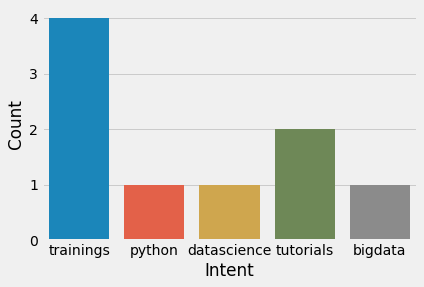

In [50]:
report = get_analysis('i2')

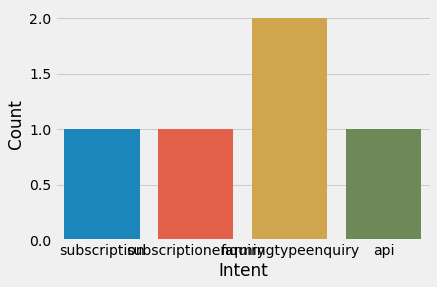

In [51]:
report = get_analysis('minikroft')

In [52]:
# Like wise we can also set the emotions by getting the good_mood or bad_mood values... Similar;y we can plot multile
# orgnisation data
